<h1>Parking places</h1>
<h2>Exploration</h2>
<p>
    <ol>
        <li>Load data</li>
        <li>Group per parking_place per day (count # transactions)</li>
        <li>Select some data (garage_id, time window)</li>
        <li>Calculate rolling mean</li>
        <li>Show graph data</li>
        <li>Add data feautures</li>
        <li>bin data 'buzy' 'not-buzy'</li>
        <li>Classify</li>
    </ol>
        <b>2018-06-12 Wico Mulder</b>
</p>


In [71]:
%matplotlib inline
import pandas as pd
import numpy as np

<h2>Load the data</h2>

In [72]:
path='../data/'

In [73]:
garage_id=37
garage_transactions=pd.read_csv(path+'../data/out-parking_events-garage'+str(garage_id)+'.csv',sep=";")

In [74]:
garage_transactions.head(5)

,garage_id,card_type_id,transaction_id,start_parking_dt,end_parking_dt,visit_datetime,visit_date,weekday_name,hour
0,37,221,1666394,1-1-2016 10:19,1-1-2016 18:54,2016-01-01 10:19:00,2016-01-01,Friday,10
1,37,221,1666396,2-1-2016 06:21,2-1-2016 12:57,2016-01-02 06:21:00,2016-01-02,Saturday,6
2,37,221,1666398,2-1-2016 08:15,2-1-2016 18:14,2016-01-02 08:15:00,2016-01-02,Saturday,8
3,37,220,1666399,2-1-2016 08:16,2-1-2016 17:56,2016-01-02 08:16:00,2016-01-02,Saturday,8
4,37,220,1666400,2-1-2016 08:19,2-1-2016 17:16,2016-01-02 08:19:00,2016-01-02,Saturday,8


In [75]:
garage_transactions.isnull().sum()

garage_id           0
card_type_id        0
transaction_id      0
start_parking_dt    0
end_parking_dt      0
visit_datetime      0
visit_date          0
weekday_name        0
hour                0
dtype: int64

In [76]:
garage_transactions['start_parking_dt'] = pd.to_datetime(garage_transactions['start_parking_dt'], format='%d-%m-%Y %H:%M')
garage_transactions['end_parking_dt'] = pd.to_datetime(garage_transactions['end_parking_dt'], format='%d-%m-%Y %H:%M')
garage_transactions['start_date'] = garage_transactions['start_parking_dt'].dt.date
garage_transactions['end_date'] =garage_transactions['end_parking_dt'].dt.date
garage_transactions['start_hour']=garage_transactions['start_parking_dt'].dt.hour
garage_transactions['end_hour']=garage_transactions['end_parking_dt'].dt.hour
garage_transactions

,garage_id,card_type_id,transaction_id,start_parking_dt,end_parking_dt,visit_datetime,visit_date,weekday_name,hour,start_date,end_date,start_hour,end_hour
0,37,221,1666394,2016-01-01 10:19:00,2016-01-01 18:54:00,2016-01-01 10:19:00,2016-01-01,Friday,10,2016-01-01,2016-01-01,10,18
1,37,221,1666396,2016-01-02 06:21:00,2016-01-02 12:57:00,2016-01-02 06:21:00,2016-01-02,Saturday,6,2016-01-02,2016-01-02,6,12
2,37,221,1666398,2016-01-02 08:15:00,2016-01-02 18:14:00,2016-01-02 08:15:00,2016-01-02,Saturday,8,2016-01-02,2016-01-02,8,18
3,37,220,1666399,2016-01-02 08:16:00,2016-01-02 17:56:00,2016-01-02 08:16:00,2016-01-02,Saturday,8,2016-01-02,2016-01-02,8,17
4,37,220,1666400,2016-01-02 08:19:00,2016-01-02 17:16:00,2016-01-02 08:19:00,2016-01-02,Saturday,8,2016-01-02,2016-01-02,8,17
5,37,220,1666401,2016-01-02 08:30:00,2016-01-02 17:51:00,2016-01-02 08:30:00,2016-01-02,Saturday,8,2016-01-02,2016-01-02,8,17
6,37,221,1666402,2016-01-02 08:33:00,2016-01-02 14:08:00,2016-01-02 08:33:00,2016-01-02,Saturday,8,2016-01-02,2016-01-02,8,14
7,37,220,1666403,2016-01-02 08:34:00,2016-01-02 17:10:00,2016-01-02 08:34:00,2016-01-02,Saturday,8,2016-01-02,2016-01-02,8,17
8,37,220,1666404,2016-01-02 08:34:00,2016-01-02 17:49:00,2016-01-02 08:34:00,2016-01-02,Saturday,8,2016-01-02,2016-01-02,8,17
9,37,220,1666405,2016-01-02 08:36:00,2016-01-02 17:25:00,2016-01-02 08:36:00,2016-01-02,Saturday,8,2016-01-02,2016-01-02,8,17


In [77]:
#visitors_in_per_hour = garage_transactions.groupby(['start_date'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_in','start_date':'date','start_hour':'hour'})
#visitors_out_per_hour = garage_transactions.groupby(['end_date'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_out','end_date':'date','end_hour':'hour'})
visitors_in_per_hour = garage_transactions.groupby(['start_date','start_hour'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_in','start_date':'date','start_hour':'hour'})
visitors_out_per_hour = garage_transactions.groupby(['end_date','end_hour'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_out','end_date':'date','end_hour':'hour'})

In [78]:
print(visitors_in_per_hour.shape)
print(visitors_out_per_hour.shape)

(11086, 3)
(13384, 3)


In [79]:
visitors_in_per_hour.head()

,date,hour,count_in
0,2016-01-01,10,1
1,2016-01-02,6,1
2,2016-01-02,8,13
3,2016-01-02,9,41
4,2016-01-02,10,46


In [80]:
visitors_out_per_hour.head()

,date,hour,count_out
0,2016-01-01,18,1
1,2016-01-02,9,1
2,2016-01-02,10,6
3,2016-01-02,11,19
4,2016-01-02,12,33


In [81]:
visitors_per_hour=pd.merge(visitors_in_per_hour,visitors_out_per_hour, on=['date','hour'], how='outer')
#we do outer --> not inner , otherwise we loose data. 
#there are periods (hours) in which people do come in, and nobody gets out, and periods in which people go out whilst nobody came in.
# this results in Nans
visitors_per_hour.shape

(15027, 4)

In [82]:
selection=visitors_per_hour[pd.isnull(visitors_per_hour).any(axis=1)]
selection.head()

,date,hour,count_in,count_out
0,2016-01-01,10,1.0,NaN
1,2016-01-02,6,1.0,NaN
2,2016-01-02,8,13.0,NaN
14,2016-01-04,6,8.0,NaN
16,2016-01-04,8,90.0,NaN


<h2>Deal with nan's </h2>
<p>
We don't throw them away here, but replace them by 0, which is appropriate in this case of merged data
    </p>

In [83]:
visitors_per_hour['count_in'] = visitors_per_hour['count_in'].fillna(0)
visitors_per_hour['count_out'] = visitors_per_hour['count_out'].fillna(0)
visitors_per_hour.isnull().sum()

date         0
hour         0
count_in     0
count_out    0
dtype: int64

In [84]:
visitors_per_hour['delta']=visitors_per_hour['count_in']-visitors_per_hour['count_out']
#sorteer de data op tijd
visitors_per_hour = visitors_per_hour.sort_values(['date', 'hour']).reset_index()
visitors_per_hour['cum_sum'] = visitors_per_hour.delta.cumsum()

In [85]:
visitors_per_hour['datetime'] = pd.to_datetime(visitors_per_hour['date'])
visitors_per_hour['week']=visitors_per_hour['datetime'].dt.week
visitors_per_hour['month']=visitors_per_hour['datetime'].dt.month
visitors_per_hour['day']=visitors_per_hour['datetime'].dt.day
visitors_per_hour['dayofyear']=visitors_per_hour['datetime'].dt.dayofyear
visitors_per_hour['weekday']=visitors_per_hour['datetime'].dt.weekday
visitors_per_hour['year']=visitors_per_hour['datetime'].dt.year

visitors_per_hour=visitors_per_hour.drop('datetime',axis=1)

In [86]:
visitors_per_hour.head(5)
name="../data/out-visitors_per_hour-garage"+str(garage_id)+".csv"
visitors_per_hour.to_csv(name,sep=";",index=False)

<h2>get the capacity value of this garage</h2>

In [87]:
parking_locations=pd.read_csv(path+'../Parkeren Data/parkeerdata/leeuwarden_garage_parking_garage_gps.csv',sep=";",decimal=",")
matched_row=parking_locations.loc[parking_locations.garage_id == garage_id]
capacity=int(matched_row.capacity_value)
print(capacity)

625


In [88]:
visitors_per_hour['perc']=100*visitors_per_hour['cum_sum']/capacity

<h2>Display how full the garage is</h2>

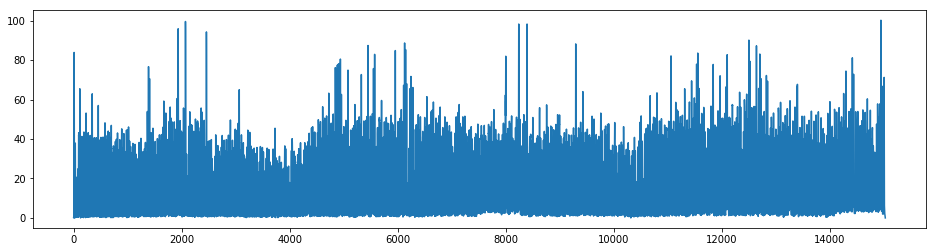

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
visitors_per_hour['perc']
fig = plt.figure(figsize=(16, 4)) 
plt.plot(visitors_per_hour['perc'])

In [90]:
from_datetime="2016-01-01"
to_datetime="2016-03-01"
# create a date_time column, and filter using a 'mask' 
visitors_per_hour['datetime'] = pd.to_datetime(visitors_per_hour['date'])
mask = (visitors_per_hour['datetime']>=from_datetime) & (visitors_per_hour['datetime'] <= to_datetime)
# not necessary, but one is allowed to remove that superfluous column here
visitors_per_hour=visitors_per_hour.drop(['datetime'], axis=1)
selected= visitors_per_hour.loc[mask]
print("from", from_datetime,"to",to_datetime,"aantal:",len(selected))

from 2016-01-01 to 2016-03-01 aantal: 989


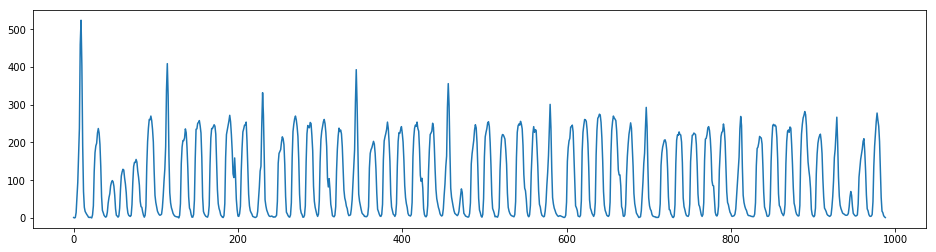

In [91]:
fig = plt.figure(figsize=(16, 4)) 
plt.plot(selected['cum_sum'])

<h2>Bin the number of visitors into 3 buckets</h2>
Create a classification model that can be used to predict number of visitors in three classes (bins): 'empty','resty' or 'crowdy'. 

<h3>a. Draw the histogram of values that we want to put into bins</h3>
The histogram will help us to visualize and define the border-values of the classes. What are options for the border values? Is the mean value a good option? 

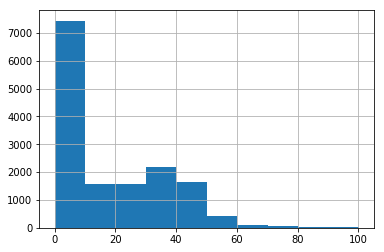

In [92]:
visitors_per_hour['perc'].hist()

<h3>c. Bin the number visitors in bins (buckets):using nummerical values for the labels 0, 0.5, 1</h3>

In [93]:
target_column=visitors_per_hour['perc']
m=target_column.mean()
#for three bins, the sd can be used
s=target_column.std()
#bins=[-1,m,1000]
bins=[-1,m-s*0.5,m+s*0.5,1000]
bin_names=['empty','resty','crowdy']
#the names are fine, but our scikit classifier uses numbers
bin_labels=[0,1,2]
visitors_per_hour['occupation'] = pd.cut(target_column, bins, labels=bin_labels)

In [94]:
bins

[-1, 9.364354432103724, 27.003953280679816, 1000]

<h3>d. Verify the dataset has a relatively equal number of 0's and 1's </h3> 
Make a histogram of the resty-or-cloudy column and check that there are approximately equal number of 0's and 1's. 

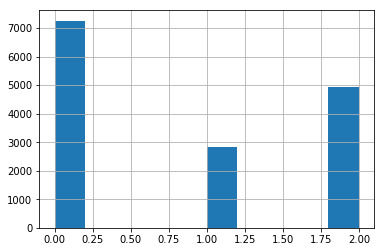

In [95]:
visitors_per_hour['occupation'].hist()

<h2>3. Build the random forest model</h2>
The output variable (or target variable) Y will be the column with the bins. All other columns are the features, or the input variables X. 

### a. Determine the columns of X

Make sure X is of the right shape and properly cleaned. Think of the following:
- The output variable Y should **not** occur as column in the input dataframe X, likewise for any column directly related to the output variable. 
- Which columns can be dropped without loss of information, or which could cause overfitting? 

In [96]:
visitors_per_hour.dtypes

index            int64
date            object
hour             int64
count_in       float64
count_out      float64
delta          float64
cum_sum        float64
week             int64
month            int64
day              int64
dayofyear        int64
weekday          int64
year             int64
perc           float64
occupation    category
dtype: object

In [97]:
X = visitors_per_hour.copy()
#drop the target_variable
X= X.drop(['occupation','cum_sum'],axis=1)
#drop id from feature table (overfitting)
X= X.drop(['index'],axis=1)
#drop visitors (explainable variable with respect to the binned-target variable)
X= X.drop('perc',axis=1)
#drop datetime (overfitting)
X= X.drop(['date'], axis=1)
#drop direct influencers
X= X.drop(['count_in','count_out','delta'], axis=1)


In [98]:
X.dtypes

hour         int64
week         int64
month        int64
day          int64
dayofyear    int64
weekday      int64
year         int64
dtype: object

In [99]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
y = visitors_per_hour['occupation']  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, shuffle = True, random_state=42)
X_train.head()

,hour,week,month,day,dayofyear,weekday,year
7399,12,10,3,11,70,5,2017
3285,19,28,7,15,197,4,2016
12393,21,49,12,10,344,6,2017
9482,21,27,7,4,185,1,2017
7346,16,10,3,8,67,2,2017


In [100]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
y_pred = clf.predict(X_test)
results={'datasize':str(X.shape),
         'mae': metrics.mean_absolute_error(y_test, y_pred),
         'rmse': metrics.mean_squared_error(y_test, y_pred),
         'accuracy_score': metrics.accuracy_score(y_test, y_pred)}        
#recall = metrics.recall_score(y_test, predicted_values)
#precision = metrics.precision_score(y_test, predicted_values)
#f1_score = metrics.f1_score(y_test, predicted_values)
print(results)
#print('recall:', recall)
#print('precision:', precision)
#print('f1 score:', f1_score)

{'datasize': '(15027, 7)', 'mae': 0.08650806854100815, 'rmse': 0.09249708867077025, 'accuracy_score': 0.9164864415238729}


In [102]:

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
topX=25
names = [X.columns[i] for i in indices[:topX]]
print(names)


['hour', 'weekday', 'dayofyear', 'day', 'week', 'year', 'month']


<h3>Create a dataframe to explore the results of the predictions of our model</h3>

In [103]:
X_dataframe=pd.DataFrame(X_test,index=X_test.index)

y_dataframe=pd.DataFrame(y_test,index=X_test.index)
y_dataframe.columns=['actual']

predictions_dataframe=pd.DataFrame(y_pred,index=X_test.index)
predictions_dataframe.columns=['predicted']

result_df=pd.concat([X_dataframe,y_dataframe,predictions_dataframe],axis=1)

result_df

,hour,week,month,day,dayofyear,weekday,year,actual,predicted
2919,12,25,6,24,176,4,2016,2,2
7414,12,10,3,12,71,6,2017,0,0
3344,16,29,7,19,201,1,2016,1,1
11010,7,39,9,28,271,3,2017,1,1
8582,23,20,5,15,135,0,2017,0,0
14446,21,13,3,31,90,5,2018,0,0
10443,22,34,8,27,239,6,2017,0,0
1662,0,15,4,12,103,1,2016,0,0
8974,9,23,6,7,158,2,2017,2,2
1226,10,11,3,16,76,2,2016,2,2


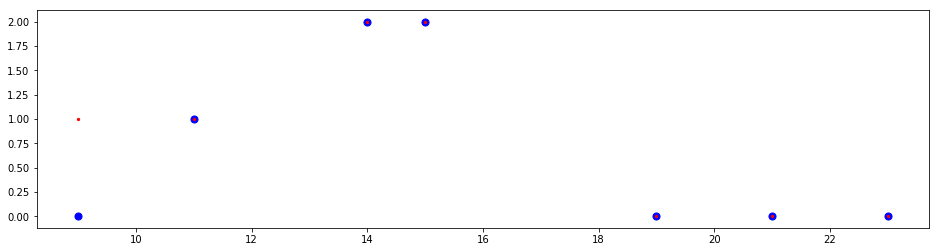

In [110]:
day=49
mask = (result_df['dayofyear']>=day) & (result_df['dayofyear']<=day) & (result_df['year']==2017)
# not necessary, but one is allowed to remove that superfluous column here
selected= result_df.loc[mask]
fig = plt.figure(figsize=(16, 4)) 
plt.scatter(selected.hour,selected.actual,s=50,c="blue")
plt.scatter(selected.hour,selected.predicted,s=5, c="red")
#selected.head(50)